# Display Water Tiles with Cloud/shadow,nodata, no-contig masked

## Fei Zhang


2016-06

In [4]:
# With all_samples.csv
NonWaters=3989595.0
Waters=947577
#At divid X0=0.1047
Waterp=858448.0
NonWaterp=93616.0

In [7]:
watpct=100.0*Waterp/Waters
print("Water Percentage correctly predicted %s" % watpct)

Water Percentage correctly predicted 90.5940097744


In [8]:
from netCDF4 import Dataset, num2date, date2num

# from IPython.html.widgets import *
from ipywidgets.widgets import *

from numpy import linspace
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10 # increase plot size a bit...
rcParams['axes.formatter.useoffset'] = False  # disable scalar formatter / offset in axes labels

import os
import glob

# Individual water tiles at a given date-time

In [77]:
#ROOT_DIR="/g/data/u46/users/fxz547/wofs2/extents/abc15_-40/clf_Mueller_"
ROOT_DIR="/g/data/u46/users/fxz547/wofs2/extents/abc15_-40"
ncfiles=glob.glob(ROOT_DIR+'/LS5_water*_1990*.nc')

print sorted(ncfiles)


['/g/data/u46/users/fxz547/wofs2/extents/abc15_-40/LS5_water_15_-40_1990-03-03T10-11-16.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc15_-40/LS5_water_15_-40_1990-03-03T10-11-39.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc15_-40/LS5_water_15_-40_1990-04-04T09-10-42.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc15_-40/LS5_water_15_-40_1990-05-06T09-10-28.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc15_-40/LS5_water_15_-40_1990-06-07T09-10-29.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc15_-40/LS5_water_15_-40_1990-07-09T09-10-50.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc15_-40/LS5_water_15_-40_1990-07-25T09-10-22.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc15_-40/LS5_water_15_-40_1990-07-25T09-10-46.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc15_-40/LS5_water_15_-40_1990-08-10T09-10-17.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc15_-40/LS5_water_15_-40_1990-08-10T09-10-41.nc', '/g/data/u46/users/fxz547/wofs2/extents/abc15_-40/LS5_water_15_-40_1990-08-26T0

In [46]:
def showimg(path2ncfile, band4view='waterextent'):

    f = Dataset(path2ncfile, 'r')

    # The NC data variable name?
    # band4view='waterextent'
    bandarray = f[band4view][:, :]  #for water tiles 2D array. this will load all data into RAM.
    
    # for summary, there may be a time dimension, 3D array
    # 3D bandarray = f[band4view][:, :, :]  

    fig = plt.figure()

    #im = plt.imshow(bandarray[time,:,:], cmap=plt.get_cmap('viridis'), animated=True)
    im = plt.imshow(bandarray[:,:],  vmin=0, vmax=128) 
    #3D im = plt.imshow(bandarray[0, :,:] ) #, cmap=plt.get_cmap('viridis'))
    plt.colorbar(orientation='vertical', shrink=0.8, label='Water=128, No-Water=0, No-Data=1');
    
    return 

#http://stackoverflow.com/questions/13784201/matplotlib-2-subplots-1-colorbar

# Show a list of nc files

In [78]:
# Show a list of nc files

# Define the list of nc tiles to be displayed
path2nc=[os.path.join(ROOT_DIR, ncf) for ncf in sorted(ncfiles)]
icount=0

def show_im(icount):
    path2ncimage=path2nc[ icount]  #

    print('showing image number:',icount, path2ncimage)
    showimg(path2ncimage)

    icount=icount+1
    if (icount ==len(ncfiles)):
        icount =0
        print ("Finished, resetting iount=0")
    return icount


In [79]:
icount=0

In [107]:
# execute this cell (ctr+enter) repeatedly until all done

icount = show_im(icount)
print("Next will be ", icount)

('showing image number:', 2, '/g/data/u46/users/fxz547/wofs2/extents/abc15_-40/LS5_water_15_-40_1990-04-04T09-10-42.nc')


RuntimeError: No such file or directory

In [73]:
!diff /g/data/u46/users/fxz547/wofs2/extents/abc15_-40/LS5_water_15_-40_1990-04-04T09-10-42.nc  /g/data/u46/users/fxz547/wofs2/extents_unification1/abc15_-40/

Binary files /g/data/u46/users/fxz547/wofs2/extents/abc15_-40/LS5_water_15_-40_1990-04-04T09-10-42.nc and /g/data/u46/users/fxz547/wofs2/extents_unification1/abc15_-40/LS5_water_15_-40_1990-04-04T09-10-42.nc differ


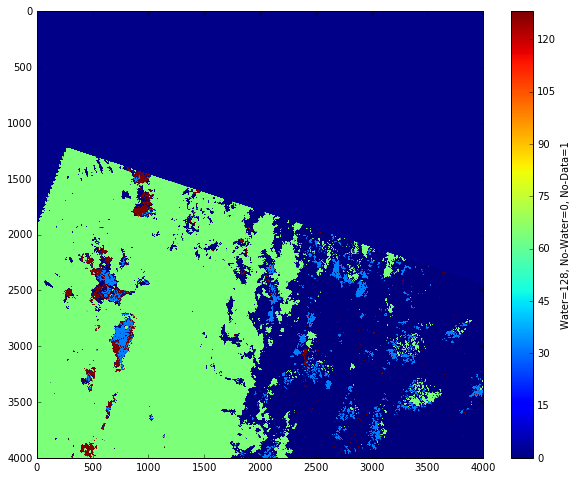

In [90]:
# If want to re-view a specific water tile
path2ncimage=path2nc[0]  
# OR
path2ncimage='/g/data/u46/users/fxz547/wofs2/extents_unification1/abc15_-40/LS5_water_15_-40_1990-08-10T09-10-41.nc'

showimg(path2ncimage)

# Show Water Summary and Clear Obs Summary

In [49]:
def show_water_summary(path2ncfile):
    
    f = Dataset(path2ncfile, 'r')
    
    # for summary, there may be a time dimension, 3D array
    waterdata= 'waterobs'
    cleardata='clearobs'
    
    warray = f[waterdata][:,:, :]  # this will load all data into RAM - may use up memory, spit out error
    carray = f[cleardata][:,:, :]
   


    #im = plt.imshow(bandarray[time,:,:], cmap=plt.get_cmap('viridis'), animated=True)
    # 2D-tiles im = plt.imshow(bandarray[:,:] ) 
#     im = plt.imshow(bandarray[0,:,:] ) #, cmap=plt.get_cmap('viridis'))
#     plt.colorbar(orientation='vertical', shrink=0.8, label='Water=128, No-Water=0, No-Data=1');

    plt.figure( figsize=(16,13) )
    
    plt.subplot( 1,3,1 )
    plt.imshow(warray[0,:,:], vmin=0, vmax=100)
    plt.title("Water Observations"); plt.xlabel('easting'); plt.ylabel('northing')
    plt.colorbar(orientation='vertical', shrink=0.3, label='obs counts');

    
    plt.subplot( 1,3,2 )
    #plt.imshow(subs_array)   # plotting the subset data directly
    plt.imshow(carray[0,:,:], vmin=0, vmax=100, )
    plt.title("Clear Observations"); plt.xlabel('easting'); plt.ylabel('northing')
    plt.colorbar(orientation='vertical', shrink=0.3, label='obs counts');


    plt.subplot( 1,3,3 )
    #plt.imshow(subs_array)   # plotting the subset data directly
    plt.imshow(warray[0,:,:]/carray[0,:,:]) #, vmin=0, vmax=1, )
    plt.title("Water/Clear Observations"); plt.xlabel('easting'); plt.ylabel('northing')
    plt.colorbar(orientation='vertical', shrink=0.3, label='obs counts');

    return



/g/data1/u46/users/fxz547/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in divide


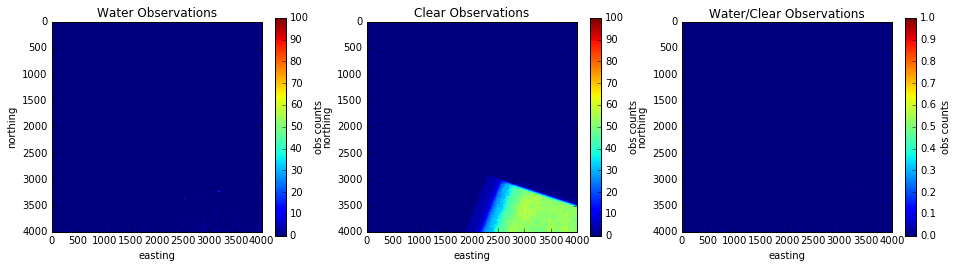

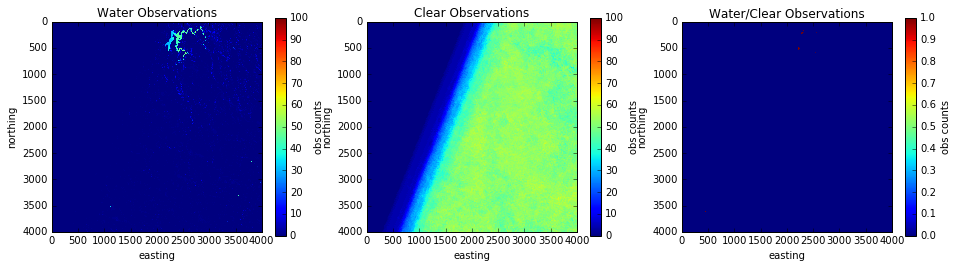

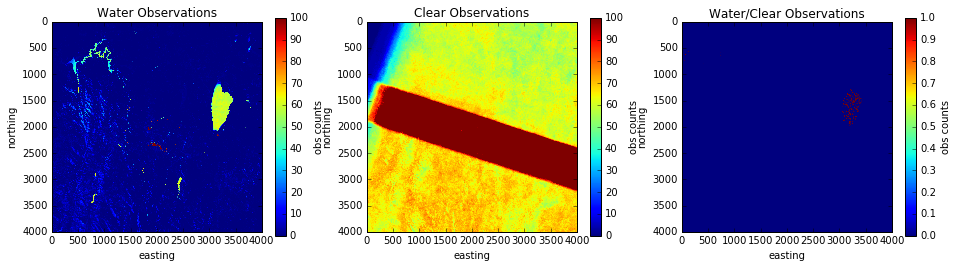

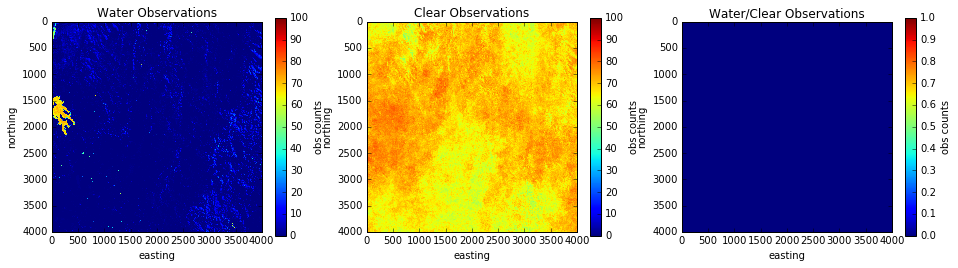

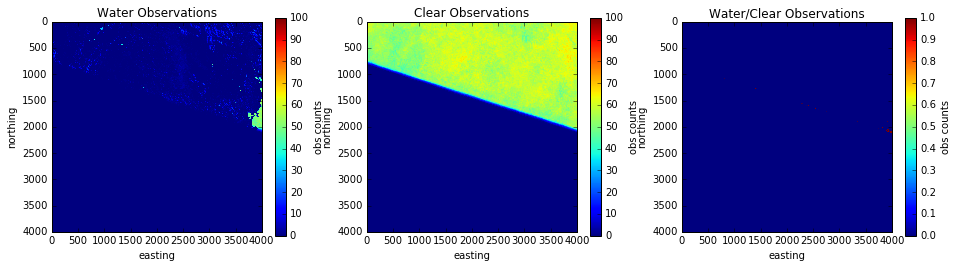

In [50]:
watersummary ="/g/data/u46/users/fxz547/wofs2/fxz547_2016-06-21T14-23-54/summaries/water_summary_15_-38.nc"
show_water_summary(watersummary)

watersummary ="/g/data/u46/users/fxz547/wofs2/fxz547_2016-06-21T14-23-54/summaries/water_summary_15_-39.nc"
show_water_summary(watersummary)


watersummary ="/g/data/u46/users/fxz547/wofs2/fxz547_2016-06-21T14-23-54/summaries/water_summary_15_-40.nc"
#watersummary ="/g/data/u46/users/fxz547/wofs2/fxz547_2016-06-21T14-23-54/summaries/water_summary_15_-41.nc"
show_water_summary(watersummary)

watersummary ="/g/data/u46/users/fxz547/wofs2/fxz547_2016-06-21T14-23-54/summaries/water_summary_15_-41.nc"
show_water_summary(watersummary)

watersummary ="/g/data/u46/users/fxz547/wofs2/fxz547_2016-06-21T14-23-54/summaries/water_summary_15_-42.nc"

show_water_summary(watersummary)

/g/data1/u46/users/fxz547/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:36: RuntimeWarning: divide by zero encountered in divide


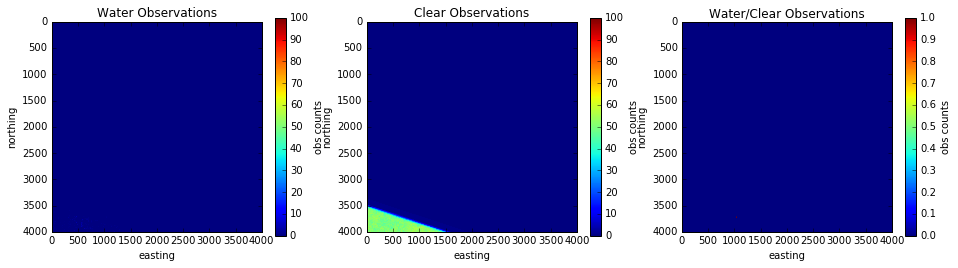

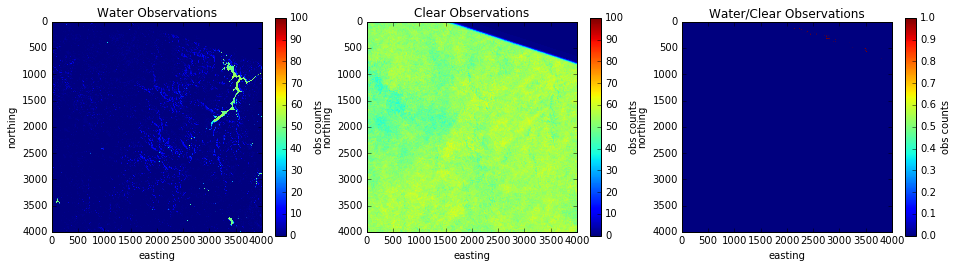

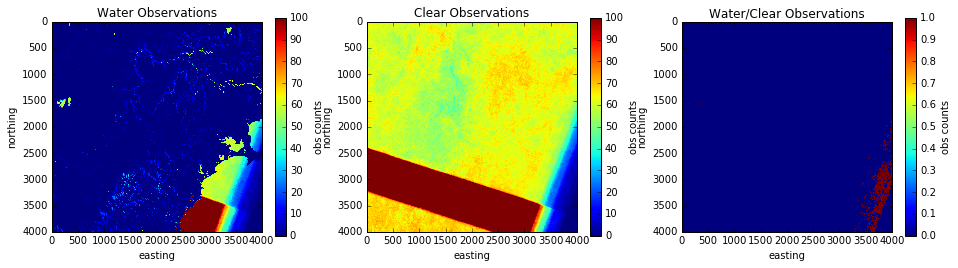

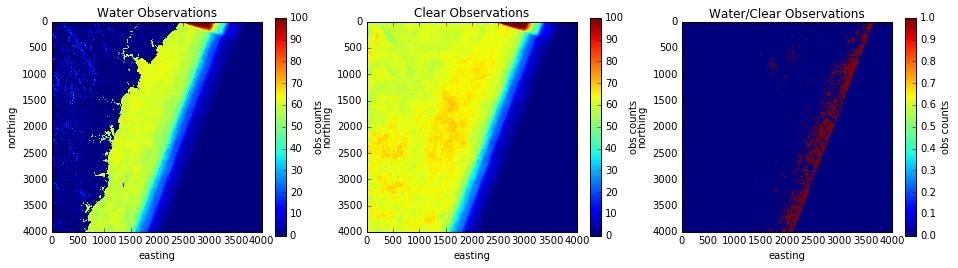

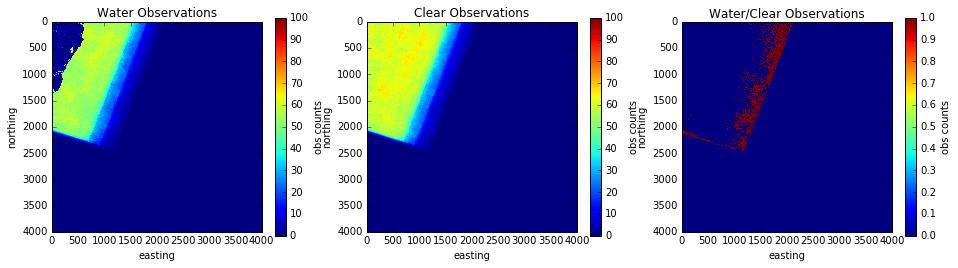

In [51]:
watersummary ="/g/data/u46/users/fxz547/wofs2/fxz547_2016-06-21T14-23-54/summaries/water_summary_16_-38.nc"
show_water_summary(watersummary)

watersummary ="/g/data/u46/users/fxz547/wofs2/fxz547_2016-06-21T14-23-54/summaries/water_summary_16_-39.nc"
show_water_summary(watersummary)

watersummary ="/g/data/u46/users/fxz547/wofs2/fxz547_2016-06-21T14-23-54/summaries/water_summary_16_-40.nc"
show_water_summary(watersummary)

watersummary ="/g/data/u46/users/fxz547/wofs2/fxz547_2016-06-21T14-23-54/summaries/water_summary_16_-41.nc"
show_water_summary(watersummary)

watersummary ="/g/data/u46/users/fxz547/wofs2/fxz547_2016-06-21T14-23-54/summaries/water_summary_16_-42.nc"
show_water_summary(watersummary)


# Display Images interactively with UI

In [ ]:
# Interactive show image. Computer slow not responsive enough!!

def showit(nf):
    path2ncimage=path2nc[nf]  
    showimg(path2ncimage)
    
nfmax= len(path2nc) -1
interact(showit, nf=(0,nfmax,1))